In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="WWZvMTFk2DSCDPOhtUd1")
project = rf.workspace("augmentationtrashnet").project("augtrashnet")
version = project.version(3)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...


In [ ]:
import os

folder_path = '/content/AugTrashNet-3/train/images'  # Example folder path
file_count = len(os.listdir(folder_path))

print(f"There are {file_count} files in the folder.")

There are 12214 files in the folder.


In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive/')

# Step 2: Define the folder path
folder_path = "/content/drive/My Drive/YOLOv11-litter-detec-folder"

# Step 3: Check contents of the folder
import os
if os.path.exists(folder_path):
    print(f"Contents of {folder_path}:")
    print(os.listdir(folder_path))
else:
    print(f"Folder {folder_path} does not exist. Check the path.")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Contents of /content/drive/My Drive/YOLOv11-litter-detec-folder:
['yolo11m.pt', 'dataset_custom.yaml', 'yolo11m-custom-litter-best.pt', 'yolo11x.pt', 'yolo11x-custom-litter-best.pt', 'yolo11n.pt', 'yolo11n-custom-litter-best.pt', 'vecteezy_a-city-s-garbage_1803529.gif', 'val', 'train']


In [ ]:
import torch
torch.cuda.is_available()

True

In [ ]:
pip install ultralytics

In [ ]:
# training

from ultralytics import YOLO

model = YOLO("/content/drive/MyDrive/YOLOv11-litter-detec-folder/yolo11m.pt")  # Or use `yolo11x.pt`
results = model.train(
    data="/content/AugTrashNet-3/data.yaml",
    imgsz=640,
    batch=16,
    epochs=100,
    workers=8,
    device=0,  # Use 0 for GPU or "cpu"
    val=True
)

Ultralytics 8.3.88 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/YOLOv11-litter-detec-folder/yolo11m.pt, data=/content/AugTrashNet-3/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf

train: Scanning /content/AugTrashNet-3/train/labels... 12214 images, 0 backgrounds, 0 corrupt: 100%|██████████| 12214/12214 [00:08<00:00, 1440.14it/s]

train: WARNING ⚠️ /content/AugTrashNet-3/train/images/cardboard129_jpg.rf.cd7ae6f920a192668d105b884436b19a.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/AugTrashNet-3/train/images/cardboard129_jpg.rf.d3431d6e16a1fbd5c983d0288703b480.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/AugTrashNet-3/train/images/cardboard156_jpg.rf.b8e98b481aca021df1d7d5ce692db1ce.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/AugTrashNet-3/train/images/cardboard298_jpg.rf.2a4a04bd87b974a6f5d8d4a59c90ee36.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/AugTrashNet-3/train/images/cardboard298_jpg.rf.71b21c3f9b3f9fe32f52391a071f7d0e.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/AugTrashNet-3/train/images/cardboard298_jpg.rf.d02aec458d9e0d93c5bf81fbc5193f8a.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/AugTrashNet-3/train/images/cardboard340_jpg.rf.0c2d550c79b0133a7bdf909ae2d64f19.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/

train: New cache created: /content/AugTrashNet-3/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/AugTrashNet-3/valid/labels... 499 images, 0 backgrounds, 0 corrupt: 100%|██████████| 499/499 [00:00<00:00, 1145.32it/s]

val: WARNING ⚠️ /content/AugTrashNet-3/valid/images/cardboard257_jpg.rf.acf5c8f13e29ca7a89a8f0f5c82416e5.jpg: 1 duplicate labels removed
val: New cache created: /content/AugTrashNet-3/valid/labels.cache


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      8.07G     0.5637      1.813      1.199         33        640: 100%|██████████| 764/764 [02:00<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.62it/s]


                   all        499        499      0.663      0.639      0.732      0.539

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      9.58G     0.4746      1.429      1.085         34        640: 100%|██████████| 764/764 [01:52<00:00,  6.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.16it/s]

                   all        499        499      0.548      0.634      0.631      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      9.58G      0.522       1.47      1.109         47        640: 100%|██████████| 764/764 [01:50<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.19it/s]

                   all        499        499      0.377      0.566      0.382      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      9.58G     0.5251      1.481      1.115         42        640: 100%|██████████| 764/764 [01:48<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.24it/s]

                   all        499        499      0.446      0.676      0.623      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      9.58G     0.4735      1.419      1.086         39        640: 100%|██████████| 764/764 [01:49<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.35it/s]

                   all        499        499      0.565      0.628       0.62      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      9.58G     0.4392      1.359      1.066         28        640: 100%|██████████| 764/764 [01:49<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.41it/s]

                   all        499        499      0.545      0.719      0.711      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      9.58G     0.4166      1.311      1.051         46        640: 100%|██████████| 764/764 [01:48<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.35it/s]

                   all        499        499      0.657      0.727      0.792      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      9.58G     0.3943      1.275      1.039         49        640: 100%|██████████| 764/764 [01:49<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.29it/s]

                   all        499        499      0.797      0.727      0.824      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      9.58G     0.3819      1.241      1.031         36        640: 100%|██████████| 764/764 [01:48<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.40it/s]

                   all        499        499       0.79      0.761       0.84      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      9.58G     0.3718      1.218      1.026         40        640: 100%|██████████| 764/764 [01:49<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.39it/s]

                   all        499        499      0.817      0.765      0.866      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      9.58G     0.3588      1.181      1.019         34        640: 100%|██████████| 764/764 [01:50<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.28it/s]

                   all        499        499      0.731      0.813       0.83      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      9.58G     0.3502      1.153      1.011         36        640: 100%|██████████| 764/764 [01:49<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.35it/s]

                   all        499        499      0.769      0.757      0.855      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      9.58G     0.3414      1.129      1.009         26        640: 100%|██████████| 764/764 [01:49<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.40it/s]

                   all        499        499      0.847      0.798      0.887      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      9.58G     0.3329      1.113      1.004         42        640: 100%|██████████| 764/764 [01:49<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.39it/s]

                   all        499        499      0.772      0.842      0.886      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      9.58G     0.3263      1.081          1         33        640: 100%|██████████| 764/764 [01:49<00:00,  7.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.33it/s]

                   all        499        499      0.832       0.81      0.885      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      9.58G     0.3212      1.068     0.9954         35        640: 100%|██████████| 764/764 [01:49<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.40it/s]

                   all        499        499      0.754      0.813      0.869      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      9.58G     0.3189      1.051     0.9965         43        640: 100%|██████████| 764/764 [01:49<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.42it/s]

                   all        499        499      0.846      0.839        0.9      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      9.58G     0.3125      1.029     0.9917         36        640: 100%|██████████| 764/764 [01:49<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.28it/s]

                   all        499        499      0.808      0.848      0.912      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      9.58G     0.3062      1.013     0.9904         46        640: 100%|██████████| 764/764 [01:49<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.37it/s]

                   all        499        499      0.859      0.859      0.922      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      9.58G     0.3044      1.003       0.99         31        640: 100%|██████████| 764/764 [01:49<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.37it/s]

                   all        499        499      0.851      0.838      0.908      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      9.58G     0.3031     0.9873     0.9866         36        640: 100%|██████████| 764/764 [01:49<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.36it/s]

                   all        499        499      0.861       0.86      0.912      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      9.58G      0.296     0.9762     0.9855         41        640: 100%|██████████| 764/764 [01:49<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.33it/s]

                   all        499        499      0.881      0.848      0.923      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      9.58G     0.2958     0.9559     0.9825         29        640: 100%|██████████| 764/764 [01:49<00:00,  6.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.34it/s]

                   all        499        499      0.892      0.837      0.916      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      9.58G     0.2921     0.9396      0.981         26        640: 100%|██████████| 764/764 [01:49<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.41it/s]

                   all        499        499      0.877      0.885      0.937      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      9.59G     0.2901     0.9274      0.982         20        640: 100%|██████████| 764/764 [01:49<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.35it/s]

                   all        499        499      0.916      0.893      0.941      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      9.59G     0.2865     0.9138     0.9782         27        640: 100%|██████████| 764/764 [01:50<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.26it/s]

                   all        499        499      0.864      0.905       0.94      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      9.59G     0.2883     0.9089     0.9815         23        640: 100%|██████████| 764/764 [01:50<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.38it/s]

                   all        499        499       0.92      0.886      0.941      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      9.59G     0.2804     0.8918     0.9748         63        640: 100%|██████████| 764/764 [01:50<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.29it/s]

                   all        499        499      0.932      0.869      0.944      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      9.59G     0.2806     0.8811     0.9756         43        640: 100%|██████████| 764/764 [01:50<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.26it/s]

                   all        499        499      0.929      0.888      0.955      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      9.59G     0.2762     0.8749     0.9735         32        640: 100%|██████████| 764/764 [01:50<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.33it/s]

                   all        499        499      0.931      0.882      0.946      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      9.59G     0.2746     0.8629     0.9723         25        640: 100%|██████████| 764/764 [01:50<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.36it/s]

                   all        499        499      0.901      0.916      0.945      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      9.59G     0.2749      0.849     0.9731         45        640: 100%|██████████| 764/764 [01:50<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.35it/s]

                   all        499        499       0.94      0.888      0.952      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      9.59G     0.2721     0.8328     0.9726         35        640: 100%|██████████| 764/764 [01:50<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.39it/s]

                   all        499        499      0.902      0.923      0.954      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      9.59G     0.2722     0.8303     0.9724         44        640: 100%|██████████| 764/764 [01:50<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.28it/s]

                   all        499        499      0.925      0.905      0.956      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      9.59G     0.2669     0.8109     0.9695         41        640: 100%|██████████| 764/764 [01:50<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.38it/s]

                   all        499        499      0.952      0.904      0.958      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      9.59G      0.268     0.8081     0.9694         39        640: 100%|██████████| 764/764 [01:49<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.38it/s]

                   all        499        499      0.933      0.922      0.956      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      9.59G     0.2663     0.8043     0.9702         44        640: 100%|██████████| 764/764 [01:50<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.39it/s]

                   all        499        499      0.932      0.917       0.96      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      9.59G     0.2637     0.7881     0.9666         36        640: 100%|██████████| 764/764 [01:50<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.32it/s]

                   all        499        499      0.921      0.935      0.962      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      9.59G     0.2619     0.7821     0.9667         22        640: 100%|██████████| 764/764 [01:49<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.35it/s]

                   all        499        499      0.933      0.916      0.964      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      9.59G     0.2611     0.7765     0.9647         39        640: 100%|██████████| 764/764 [01:50<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.37it/s]

                   all        499        499      0.916      0.935      0.967      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      9.59G     0.2577     0.7644     0.9649         34        640: 100%|██████████| 764/764 [01:49<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.33it/s]

                   all        499        499      0.921      0.936      0.969      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      9.59G     0.2576     0.7569     0.9639         46        640: 100%|██████████| 764/764 [01:49<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.36it/s]

                   all        499        499      0.931      0.935      0.959      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      9.59G     0.2587     0.7495     0.9659         33        640: 100%|██████████| 764/764 [01:50<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.40it/s]

                   all        499        499      0.936      0.942      0.972      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      9.59G     0.2536     0.7318     0.9613         36        640: 100%|██████████| 764/764 [01:50<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.29it/s]

                   all        499        499      0.952      0.921      0.972      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      9.59G     0.2541     0.7316     0.9621         44        640: 100%|██████████| 764/764 [01:49<00:00,  6.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.42it/s]

                   all        499        499       0.95      0.916      0.971      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      9.59G     0.2505     0.7186     0.9585         31        640: 100%|██████████| 764/764 [01:50<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.38it/s]

                   all        499        499       0.95      0.922      0.972      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      9.59G     0.2507     0.7149     0.9601         23        640: 100%|██████████| 764/764 [01:50<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.36it/s]

                   all        499        499      0.936      0.947      0.971      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      9.59G     0.2512     0.7161     0.9611         21        640: 100%|██████████| 764/764 [01:49<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.34it/s]

                   all        499        499      0.921      0.945      0.967      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      9.59G     0.2485      0.698     0.9583         35        640: 100%|██████████| 764/764 [01:49<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.39it/s]

                   all        499        499      0.958       0.91      0.973      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      9.59G     0.2452     0.6944     0.9583         43        640: 100%|██████████| 764/764 [01:50<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.33it/s]

                   all        499        499       0.95      0.923      0.971      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      9.59G     0.2407     0.6773     0.9552         26        640: 100%|██████████| 764/764 [01:50<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.26it/s]

                   all        499        499      0.954      0.946      0.975      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      9.59G      0.241     0.6723     0.9546         31        640: 100%|██████████| 764/764 [01:49<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.33it/s]

                   all        499        499       0.96      0.926      0.975      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      9.59G     0.2426     0.6708     0.9558         43        640: 100%|██████████| 764/764 [01:50<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.38it/s]

                   all        499        499      0.948      0.937      0.977      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      9.59G     0.2386      0.658     0.9525         41        640: 100%|██████████| 764/764 [01:50<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.39it/s]

                   all        499        499      0.946      0.954      0.974      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      9.59G     0.2402     0.6617     0.9554         40        640: 100%|██████████| 764/764 [01:49<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.43it/s]

                   all        499        499      0.944      0.947      0.974      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      9.59G     0.2371      0.652     0.9533         36        640: 100%|██████████| 764/764 [01:50<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.35it/s]

                   all        499        499      0.952      0.936      0.975      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      9.59G     0.2359     0.6394     0.9529         40        640: 100%|██████████| 764/764 [01:49<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.37it/s]

                   all        499        499      0.944      0.935      0.975       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      9.59G     0.2376     0.6402     0.9537         48        640: 100%|██████████| 764/764 [01:50<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.38it/s]

                   all        499        499      0.936      0.948      0.975      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      9.59G     0.2355     0.6278     0.9538         28        640: 100%|██████████| 764/764 [01:50<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.31it/s]

                   all        499        499      0.946      0.944      0.973      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      9.59G     0.2328     0.6173     0.9521         35        640: 100%|██████████| 764/764 [01:50<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.27it/s]

                   all        499        499      0.936      0.946      0.972      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      9.59G      0.231     0.6099     0.9492         48        640: 100%|██████████| 764/764 [01:50<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.38it/s]

                   all        499        499      0.928      0.963      0.973      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      9.59G     0.2281     0.6037     0.9475         41        640: 100%|██████████| 764/764 [01:50<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.42it/s]

                   all        499        499      0.937      0.959      0.972      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      9.59G     0.2304     0.5993     0.9496         41        640: 100%|██████████| 764/764 [01:50<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.31it/s]

                   all        499        499      0.938      0.948      0.972      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      9.59G     0.2269     0.5935     0.9463         45        640: 100%|██████████| 764/764 [01:50<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.36it/s]

                   all        499        499      0.944      0.944      0.972      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      9.59G     0.2284     0.5894     0.9476         38        640: 100%|██████████| 764/764 [01:50<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.37it/s]

                   all        499        499      0.936      0.962      0.972      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      9.59G     0.2273     0.5826     0.9494         35        640: 100%|██████████| 764/764 [01:50<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.37it/s]

                   all        499        499      0.948      0.959      0.973      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      9.59G     0.2213     0.5691     0.9437         31        640: 100%|██████████| 764/764 [01:50<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.39it/s]

                   all        499        499      0.949      0.957      0.972      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      9.59G        inf     0.5629     0.9464         35        640: 100%|██████████| 764/764 [01:50<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.36it/s]

                   all        499        499      0.946      0.952      0.974      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      9.59G     0.2211     0.5567     0.9453         55        640: 100%|██████████| 764/764 [01:50<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.34it/s]

                   all        499        499      0.955      0.943      0.974      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      9.59G     0.2219     0.5543     0.9429         33        640: 100%|██████████| 764/764 [01:50<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.40it/s]

                   all        499        499      0.954      0.947      0.974      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      9.59G     0.2178     0.5496     0.9413         25        640: 100%|██████████| 764/764 [01:50<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.33it/s]

                   all        499        499      0.946      0.948      0.976       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      9.59G        inf     0.5422     0.9415         59        640: 100%|██████████| 764/764 [01:50<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.39it/s]

                   all        499        499      0.943      0.958      0.976      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      9.59G     0.2152     0.5365     0.9418         41        640: 100%|██████████| 764/764 [01:50<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.32it/s]

                   all        499        499      0.943      0.959      0.976      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      9.59G     0.2149     0.5238     0.9406         27        640: 100%|██████████| 764/764 [01:50<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.40it/s]

                   all        499        499      0.947      0.954      0.975      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      9.59G     0.2129     0.5258     0.9403         38        640: 100%|██████████| 764/764 [01:50<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.42it/s]

                   all        499        499       0.95      0.952      0.975      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      9.59G     0.2123     0.5168     0.9382         36        640: 100%|██████████| 764/764 [01:50<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.39it/s]

                   all        499        499      0.948      0.951      0.976      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      9.59G        inf     0.5103     0.9373         34        640: 100%|██████████| 764/764 [01:50<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.37it/s]

                   all        499        499      0.952      0.946      0.976      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      9.59G     0.2084     0.5057     0.9368         46        640: 100%|██████████| 764/764 [01:50<00:00,  6.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.34it/s]

                   all        499        499      0.942      0.956      0.975       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      9.59G     0.2076     0.5002     0.9341         30        640: 100%|██████████| 764/764 [01:50<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.31it/s]

                   all        499        499      0.949      0.953      0.975      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      9.59G     0.2074     0.4944     0.9344         39        640: 100%|██████████| 764/764 [01:50<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.36it/s]

                   all        499        499      0.945      0.958      0.975      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      9.59G        inf     0.4879     0.9346         35        640: 100%|██████████| 764/764 [01:50<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.34it/s]

                   all        499        499      0.947      0.958      0.975       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      9.59G     0.2032     0.4801     0.9343         38        640: 100%|██████████| 764/764 [01:50<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.38it/s]

                   all        499        499       0.95      0.957      0.975      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      9.59G     0.2002     0.4778     0.9337         47        640: 100%|██████████| 764/764 [01:50<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.34it/s]

                   all        499        499      0.951      0.957      0.975      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      9.59G      0.199     0.4653     0.9307         28        640: 100%|██████████| 764/764 [01:50<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.35it/s]

                   all        499        499      0.951      0.956      0.975      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      9.59G     0.1965     0.4629     0.9312         36        640: 100%|██████████| 764/764 [01:50<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.40it/s]

                   all        499        499      0.952      0.956      0.975      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      9.59G     0.1967     0.4513     0.9295         44        640: 100%|██████████| 764/764 [01:50<00:00,  6.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.39it/s]

                   all        499        499      0.953      0.959      0.975      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      9.59G      0.198     0.4537     0.9288         33        640: 100%|██████████| 764/764 [01:50<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.35it/s]

                   all        499        499      0.953      0.959      0.975      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      9.59G     0.1955     0.4492     0.9317         26        640: 100%|██████████| 764/764 [01:50<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.31it/s]

                   all        499        499      0.952      0.955      0.975      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      9.59G        inf      0.448     0.9287         42        640: 100%|██████████| 764/764 [01:50<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.38it/s]

                   all        499        499      0.953      0.952      0.975      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      9.59G     0.1914     0.4318     0.9281         39        640: 100%|██████████| 764/764 [01:50<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.38it/s]

                   all        499        499      0.955      0.952      0.975       0.85


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      9.59G     0.1597     0.2277     0.9207         21        640: 100%|██████████| 764/764 [01:50<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.19it/s]

                   all        499        499      0.955      0.952      0.975       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      9.59G     0.1539     0.2063     0.9177         15        640: 100%|██████████| 764/764 [01:49<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.25it/s]

                   all        499        499      0.958       0.95      0.976       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      9.59G     0.1516     0.1961     0.9117         15        640: 100%|██████████| 764/764 [01:49<00:00,  6.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.38it/s]

                   all        499        499      0.958      0.952      0.976      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      9.59G     0.1497     0.1895     0.9127         18        640: 100%|██████████| 764/764 [01:50<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.36it/s]

                   all        499        499      0.956      0.953      0.976      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      9.59G      0.148     0.1862     0.9099          9        640: 100%|██████████| 764/764 [01:49<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.39it/s]

                   all        499        499      0.956      0.953      0.977      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      9.59G     0.1453     0.1751     0.9098         21        640: 100%|██████████| 764/764 [01:50<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.31it/s]

                   all        499        499      0.958      0.952      0.977      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      9.59G     0.1417     0.1708     0.9063         15        640: 100%|██████████| 764/764 [01:50<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.39it/s]

                   all        499        499      0.957      0.953      0.977      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      9.59G     0.1398      0.165     0.9038         15        640: 100%|██████████| 764/764 [01:50<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.32it/s]

                   all        499        499      0.956      0.953      0.977      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      9.59G     0.1392     0.1617      0.905         21        640: 100%|██████████| 764/764 [01:50<00:00,  6.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.37it/s]

                   all        499        499      0.955      0.955      0.978      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      9.59G     0.1363     0.1592     0.9042         18        640: 100%|██████████| 764/764 [01:50<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.35it/s]

                   all        499        499      0.956      0.955      0.978      0.857



100 epochs completed in 3.148 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 40.5MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 40.5MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.88 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11m summary (fused): 125 layers, 20,034,658 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  4.92it/s]


                   all        499        499      0.956      0.955      0.978      0.857
             cardboard         74         74          1      0.972      0.994      0.978
                 glass         96         96      0.979      0.975      0.991      0.827
                 metal         85         85      0.964      0.988      0.986      0.863
                 paper        117        117      0.974      0.961      0.973       0.89
               plastic         98         98      0.968      0.935      0.976       0.79
                 trash         29         29      0.851      0.897      0.947      0.795
Speed: 0.1ms preprocess, 1.9ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79dc143b8c10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     

In [ ]:
import shutil

# Specify the folder or directory you want to zip
folder_to_zip = "/content/runs"

# Specify the name of the output ZIP file
output_zip_file = "/content/runs.zip"

# Create the ZIP file
shutil.make_archive(base_name=output_zip_file.replace(".zip", ""), format="zip", root_dir=folder_to_zip)

print(f"ZIP file created: {output_zip_file}")

ZIP file created: /content/runs.zip


In [ ]:
# Display the test predictions
results.show_images()

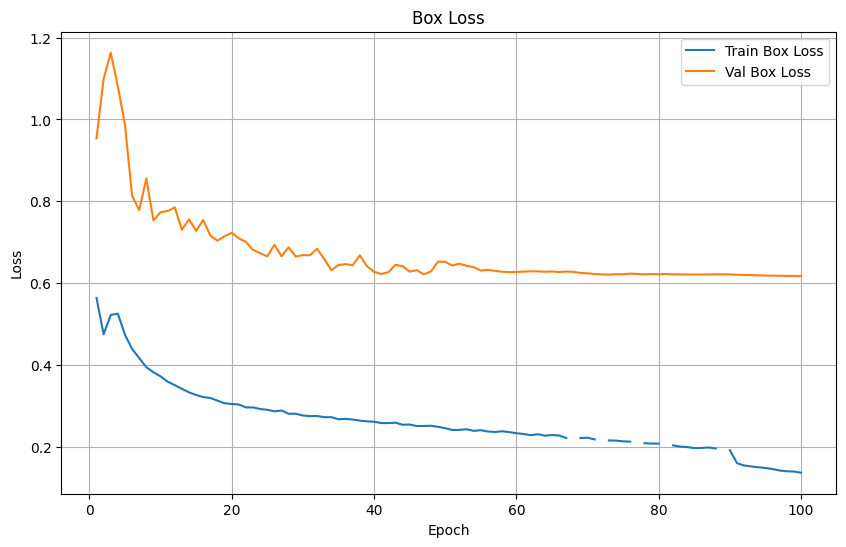

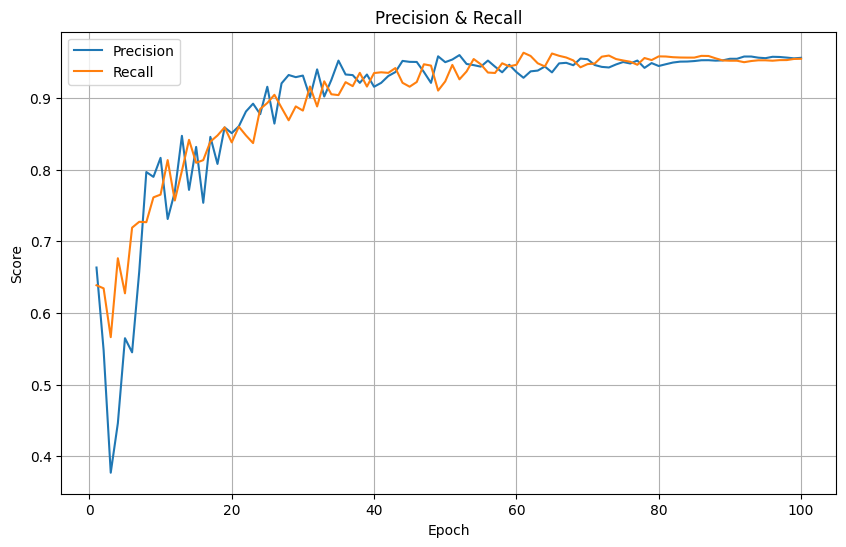

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import display

# Load YOLO results CSV file
log_path = "runs/detect/train2/results.csv"
df = pd.read_csv(log_path)

# Plot Loss Graph
plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], df['train/box_loss'], label='Train Box Loss')
plt.plot(df['epoch'], df['val/box_loss'], label='Val Box Loss')
plt.title('Box Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Precision & Recall
plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], df['metrics/precision(B)'], label='Precision')
plt.plot(df['epoch'], df['metrics/recall(B)'], label='Recall')
plt.title('Precision & Recall')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()
